In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

2.9.1


In [22]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
len(train_features), len(train_labels), len(test_features), len(test_labels)

(60000, 60000, 10000, 10000)

In [23]:
train_features = train_features / 255.0
test_features = test_features / 255.0

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=train_features[0].shape + (1, )), 
    tf.keras.layers.Conv2D(32, 3, activation='relu',), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, 3, activation='relu',), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(196, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
    metrics=['acc'],
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)        

In [26]:
MODEL_NAME = './models/fmnist_2d_full_verse.h5'
MONITOR = 'val_loss'
BATCH_SIZE = 32
EPOCHS = 100
PATIENCE = 3

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.1, patience=PATIENCE, min_lr=1e-5)]
callbacks += [tf.keras.callbacks.ModelCheckpoint(MODEL_NAME, monitor=MONITOR, save_best_only=True)]
callbacks += [tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=PATIENCE*2, restore_best_weights=True)]

history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/100
1500/1500 [==============================] - 27s 17ms/step - loss: 0.4478 - acc: 0.8383 - val_loss: 0.3302 - val_acc: 0.8813 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3174 - acc: 0.8831 - val_loss: 0.2983 - val_acc: 0.8903 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2791 - acc: 0.8980 - val_loss: 0.2463 - val_acc: 0.9086 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2537 - acc: 0.9061 - val_loss: 0.2704 - val_acc: 0.9035 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2348 - acc: 0.9139 - val_loss: 0.2345 - val_acc: 0.9142 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2215 - acc: 0.9173 - val_loss: 0.2208 - val_acc: 0.9188 - lr: 0.0010
Epoch 7/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2054 - acc: 0.9228 

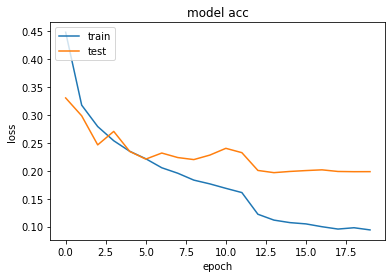

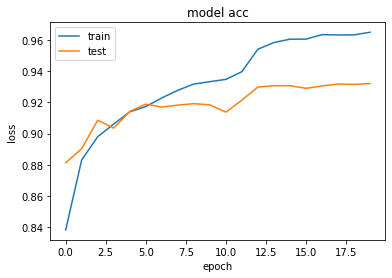

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model = tf.keras.models.load_model(MODEL_NAME)
results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE)
print(results)

ypred = np.argmax(model.predict(test_features), axis=1)
print(accuracy_score(test_labels, ypred))

313/313 [==============================] - 1s 4ms/step - loss: 0.2215 - acc: 0.9258
[0.22148247063159943, 0.9258000254631042]
313/313 [==============================] - 1s 2ms/step
0.9258


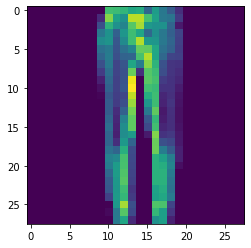

In [38]:
plt.imshow(test_features[THIRD_IMAGE])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 13ms/step


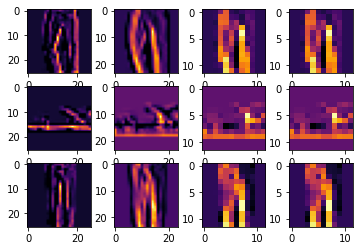

In [64]:
from tensorflow.keras import models

print(test_labels[:100])

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=5
SECOND_IMAGE=90
THIRD_IMAGE=65
CONVOLUTION_NUMBER = 7

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_features[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_features[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_features[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)